In [9]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [17]:
turbina = pd.read_csv("C:\\Users\\Lize\\Downloads\\T1.csv")
turbina.columns = ['Data/hora', 'Potencia(KW)', 'VelocidadeVento (m/s)', 'CurvaTeórica(KWh)', 'DireçãoVento(°)' ]
del turbina['DireçãoVento(°)']
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format='%d %m %Y %H:%M')

display(turbina)

,Data/hora,Potencia(KW),VelocidadeVento (m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<Axes: xlabel='VelocidadeVento (m/s)', ylabel='Potencia(KW)'>

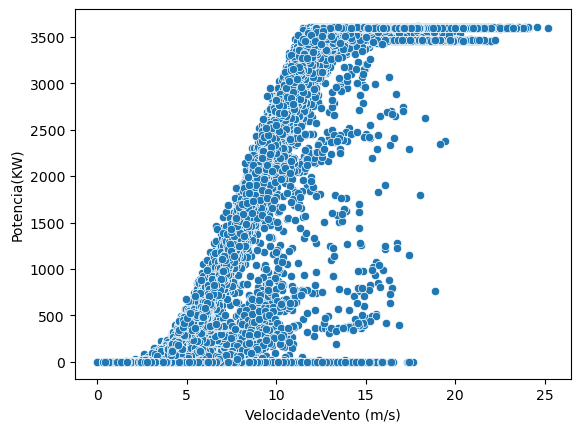

In [18]:
sns.scatterplot(data=turbina, x= 'VelocidadeVento (m/s)' , y= 'Potencia(KW)')

<Axes: xlabel='VelocidadeVento (m/s)', ylabel='CurvaTeórica(KWh)'>

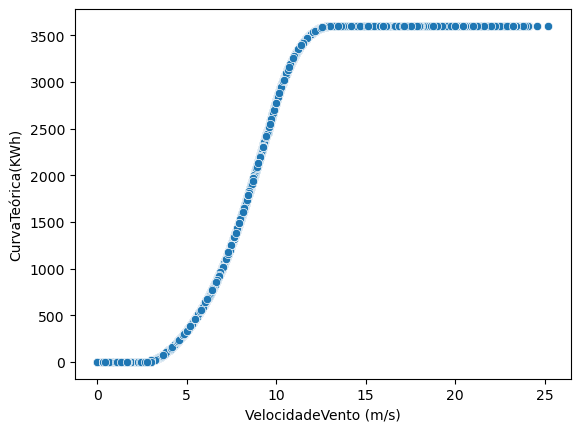

In [19]:
sns.scatterplot(data=turbina, x= 'VelocidadeVento (m/s)' , y= 'CurvaTeórica(KWh)')

In [26]:
pot_real = turbina['Potencia(KW)'].tolist() #potencia minima menos 5%
pot_teorica = turbina['CurvaTeórica(KWh)'].tolist() #potencia maxima mais 5%

pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

#print(len(pot_max),len(pot_min),len(pot_teorica))

for i, potencia in enumerate(pot_real):
    if potencia >= pot_min[i] and potencia <= pot_max[i]:
        dentro_limite.append('Dentro')
        
    elif potencia == 0:
        dentro_limite.append('Zero')
    else: 
        dentro_limite.append('Fora')
        
print(dentro_limite.count('Dentro')/len(dentro_limite))
        


0.37286760340391845


In [27]:
turbina['DentroLimite'] = dentro_limite
display(turbina)


,Data/hora,Potencia(KW),VelocidadeVento (m/s),CurvaTeórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<Axes: xlabel='VelocidadeVento (m/s)', ylabel='Potencia(KW)'>

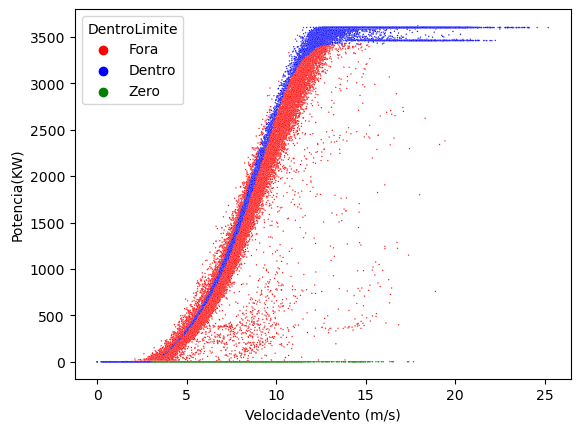

In [33]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'green'}

sns.scatterplot(data=turbina, x= 'VelocidadeVento (m/s)' , y= 'Potencia(KW)', hue='DentroLimite', s=1, palette=cores)